In [ ]:
!pip install --upgrade pandas_datareader

     |████████████████████████████████| 109 kB 7.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import numpy as np
import pandas as pd

import pandas_datareader as pdr

In [ ]:
ff = pdr.get_data_famafrench('F-F_Research_Data_Factors', 1965)

In [ ]:
type(ff)

dict

In [ ]:
ff.keys()

dict_keys([0, 1, 'DESCR'])

In [ ]:
print(ff['DESCR'])

F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202202 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2022 Kenneth R. French

  0 : (686 rows x 4 cols)
  1 : Annual Factors: January-December (57 rows x 4 cols)


In [ ]:
ff = ff[0]

In [ ]:
ff = ff / 100

In [ ]:
ff.describe()

,Mkt-RF,SMB,HML,RF
count,686.000000,686.000000,686.000000,686.000000
mean,0.005640,0.002071,0.002857,0.003673
std,0.045003,0.030894,0.029647,0.002711
min,-0.232400,-0.172900,-0.140200,0.000000
25%,-0.020200,-0.017175,-0.014175,0.001400
50%,0.009200,0.001500,0.002250,0.003900
75%,0.034800,0.020600,0.017000,0.005100
max,0.161000,0.214800,0.127900,0.013500


In [ ]:
ff.mean() * 12

Mkt-RF    0.067678
SMB       0.024850
HML       0.034282
RF        0.044071
dtype: float64

## Market, Size, and Value factors

The data contain monthly returns on four assets:

- **Mkt-RF** is return on the market portfolio in excess of the riskfree rate. The market portfolio is the CRSP value-weighted portfolio, which includes all stocks traded on U.S. public markets, but uses market-capitalization to weight returns. That is, large stocks have more of an impact on the return of the portfolio than small stocks. This factor is usually referred to as **RMRF**.

- **SMB** (“small-minus-big”) is the return on a portfolio that is long *small* stocks and short *big* stocks.

- **HML** (“high-minus-low”) is the return on a portfolio that is long *value* stocks and short *growth* stocks.

- **RF** is the riskfree rate, which is proxied by the 1-month T-Bill.

RMRF, SMB, and HML are known as *factor-mimicking portfolios*. That is, they are portfolios whose returns are meant to mimick the returns of some underlying economic factor.

The SMB and HML portfolios are constructed from six underlying portfolios that include stocks based on two characteristics:

- **Size** is the market capitalization of the company, equal to number of shares outstanding times the share price;

- **Book-to-market** is the book value of equity divided by market value of equity.

At each point in time, firms with below-median size are called “small” and those above the median are “big”. On the book-to-market dimension, firms are divided into three groups (below 30th percentile, between the 30th and 70th percentile, and above the 70th percentile.) Those with the highest book-to-market are called “value” stocks, while those with the lowest book-to-market are “growth” stocks. Stocks with high book-to-market are typically companies with lots of physical assets but not a lot of growth opportunities, like a utility company. Stocks with low book-to-market are those with a lot of market value relative to their assets, which usually means they have a lot of growth opportunities that make investors willing to pay relatively high prices today to buy shares.

This grouping provides six portfolios to use as building blocks for the factors:

|         | Small         | Big         |
|---------|---------------|-------------|
| **Value**   | Small Value   | Big Value   |
| **Neutral** | Small Neutral | Big Neutral |
| **Growth**  | Small Growth  | Big Growth  |

The factors are then long-short portfolios that combine these six building block portfolios differently. The size factor is

\begin{equation*}
SMB = \frac{1}{3}(\text{Small Value} + \text{Small Neutral} + \text{Small Growth})
- \frac{1}{3}(\text{Big Value} + \text{Big Neutral} + \text{Big Growth}),
\end{equation*}


and the value factor is

$$HML = \frac{1}{2}(\text{Small Value} + \text{Big Value}) - \frac{1}{2}(\text{Small Growth} + \text{Big Growth}).$$

All three factors mimicking are *arbitrage*, *self-financing*, or *zero net-investment* portfolios. While it may be hard to implement for a small investor, theoretically these portfolios could be constructed with no investment — you pay for the long side with funds generated from the short side. With RMRF, for example, we would borrow at the riskfree rate to invest in the market portfolio.

In [ ]:
import matplotlib.pyplot as plt

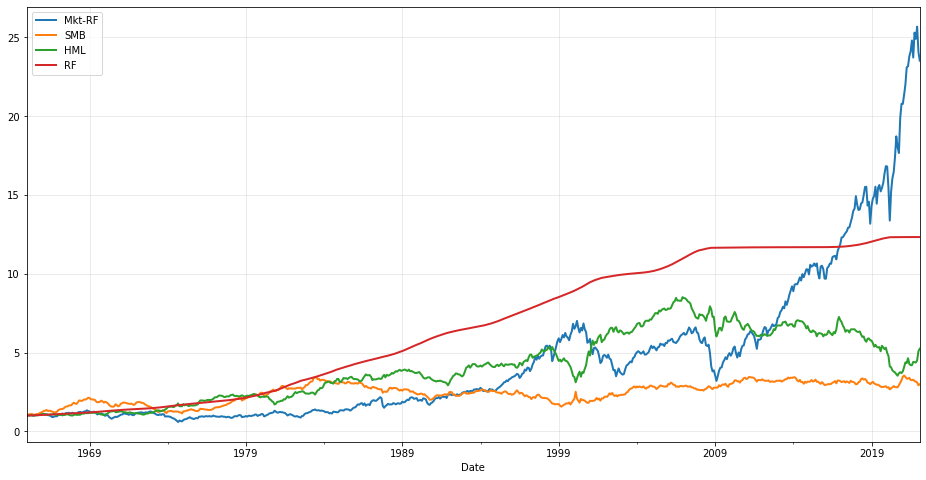

In [ ]:
fig, ax = plt.subplots()
(1+ff).cumprod().plot(figsize=(16,8), lw=2, ax=ax)
ax.grid(alpha=0.3)
ax.legend(loc='upper left')

## The one-factor model: CAPM

The Capital Asset Pricing Model (CAPM) says that an asset's expected return depends on its *beta*, denoted $\beta$. That is,

$$E(R^e_i) = \beta_i \, E(R_M^e),$$

where $R^e_i := R_i - R_f$ is the *excess return* on asset $i$ and $R_M$ is the return on the market portfolio.

The CAPM is a *one-factor* model, where the market portfolio is the single factor — the fundamental source of risk in the economy. A factor model of returns says that the returns on an asset come from:

1. How much return we get from being exposed to any *risk factor*. In the CAPM, this is $E(R_M^e)$, the expected excess return from holding the market.

2. How much exposure to a factor we get from holding a particular asset. This is the asset's beta, $\beta_i$. It is also called the *factor loading*. If a stock has high factor loadings, it gives high exposure to the underlying source of risk and is therefore riskier than a stock that has a low factor loading. So high-beta stocks are riskier than low-beta stocks. This is why we say beta is a measure of an asset's risk.

We saw that historically, the market portfolio has earned an excess return of about 8% per year. If an investor just holds the market portfolio, this is the return they earn for bearing market risk. An investor can earn a higher return by buying a stock with $\beta_i>1$, allowing them to load up on more of the risk factor. If the investor wants to own a stocks with less risk, she buys a stock with $\beta_i<1$ (and therefore earn a return below that of the market.

### What is risk?

The CAPM says that a high-beta stock should earn a higher return than a low beta stock. As long as arbitrage opportunities are not common in financial markets, we can only earn higher returns by taking on more risk. Therefore, the higher returns from high betas must be due to higher risk. But why is beta a measure of risk?

It is easiest to understand this if we step back and define what we mean by risk. Economically, a risky asset is one that pays off when times are “good.” This might strange, but stop and think: if you buy an insurance contract against something bad happening, are you increasing your risk or decreasing it? You should agree that insurance reduces risk. Home insurance pays you when your house burns down. It pays off in bad times. (Insurance also has a negative expected return. It has regular negative cash flows, and with a very small probability has a large positive cash flow.)

In economic models, times are “good” when people have low *marginal utility*. Their needs are being met. They have food to eat, and so having more food won't increase their utility much. Times are “bad” when they have high marginal utility; their utility would increase a lot if they were able to consume more.

So a low-risk asset should be one that pays off when times are bad. It will allow you to buy more food precisely at the time that you are hungry, just like the insurance contract allows you to build a house when your house burns down. A high-risk asset pays off in good times, when you already have what you need and another dollar isn't going to have much of an effect on your utility.

In the CAPM, the measure of whether times are good or bad is the market portfolio. This obviously ignores all kinds of important economic information about the welfare of people in an economy, but it is the measure that CAPM uses. (There are other asset pricing models that use other proxies to measure marginal utility.)

Assets with high betas must earn higher expected returns in order to incentivise investors to own these assets. People who are risk averse are willing to hold risky assets, but must be compensated for doing so.

## 1-factor regressions

We can estimate an asset's $\beta$ by running a time series regression,

$$R_{i,t}^e = \alpha_i + \beta_i R_{M,t}^e + \epsilon_{i,t}.$$

The prediction of the CAPM in this context is that the $\alpha_i$ should be zero.

When we run a regression, we choose values of $\alpha$ and $\beta$ in such a way as to make the *residuals* $\epsilon$ as small as possible. Specifically, the regression technique minimizes the sum of squared residuals, $\sum_{t=1}^T \epsilon_t^2.$

In [ ]:
ff_d = pdr.get_data_famafrench('F-F_Research_Data_Factors_daily', 2010)[0]

ff_d = ff_d / 100

In [ ]:
visa = pdr.get_data_yahoo('V', 2010)['Adj Close'].pct_change()

In [ ]:
visa

Date
2010-01-04         NaN
2010-01-05   -0.011459
2010-01-06   -0.013428
2010-01-07    0.009307
2010-01-08    0.002767
                ...   
2022-04-12   -0.015600
2022-04-13    0.008846
2022-04-14   -0.002251
2022-04-18    0.001786
2022-04-19    0.004785
Name: Adj Close, Length: 3095, dtype: float64

In [ ]:
visa.name = 'ret'

In [ ]:
ff_d

,Mkt-RF,SMB,HML,RF
Date,,,,
2010-01-04,0.0169,0.0061,0.0113,0.0
2010-01-05,0.0031,-0.0064,0.0124,0.0
2010-01-06,0.0013,-0.0022,0.0057,0.0
2010-01-07,0.0040,0.0009,0.0098,0.0
2010-01-08,0.0033,0.0037,0.0001,0.0
...,...,...,...,...
2022-02-22,-0.0118,-0.0051,0.0012,0.0
2022-02-23,-0.0196,-0.0019,0.0125,0.0
2022-02-24,0.0188,0.0148,-0.0385,0.0


In [ ]:
reg = ff_d.join(visa)

In [ ]:
reg

,Mkt-RF,SMB,HML,RF,ret
Date,,,,,
2010-01-04,0.0169,0.0061,0.0113,0.0,NaN
2010-01-05,0.0031,-0.0064,0.0124,0.0,-0.011459
2010-01-06,0.0013,-0.0022,0.0057,0.0,-0.013428
2010-01-07,0.0040,0.0009,0.0098,0.0,0.009307
2010-01-08,0.0033,0.0037,0.0001,0.0,0.002767
...,...,...,...,...,...
2022-02-22,-0.0118,-0.0051,0.0012,0.0,-0.006152
2022-02-23,-0.0196,-0.0019,0.0125,0.0,-0.024264
2022-02-24,0.0188,0.0148,-0.0385,0.0,0.006251


In [ ]:
reg['exret'] = reg['ret'] - reg['RF']

In [ ]:
reg

,Mkt-RF,SMB,HML,RF,ret,exret
Date,,,,,,
2010-01-04,0.0169,0.0061,0.0113,0.0,NaN,NaN
2010-01-05,0.0031,-0.0064,0.0124,0.0,-0.011459,-0.011459
2010-01-06,0.0013,-0.0022,0.0057,0.0,-0.013428,-0.013428
2010-01-07,0.0040,0.0009,0.0098,0.0,0.009307,0.009307
2010-01-08,0.0033,0.0037,0.0001,0.0,0.002767,0.002767
...,...,...,...,...,...,...
2022-02-22,-0.0118,-0.0051,0.0012,0.0,-0.006152,-0.006152
2022-02-23,-0.0196,-0.0019,0.0125,0.0,-0.024264,-0.024264
2022-02-24,0.0188,0.0148,-0.0385,0.0,0.006251,0.006251


In [ ]:
reg.describe()

,Mkt-RF,SMB,HML,RF,ret,exret
count,3060.000000,3060.000000,3060.000000,3060.000000,3059.000000,3059.000000
mean,0.000571,0.000014,-0.000063,0.000018,0.000906,0.000888
std,0.011108,0.005948,0.007532,0.000030,0.016235,0.016235
min,-0.120000,-0.036000,-0.050200,0.000000,-0.135472,-0.135532
25%,-0.003700,-0.003500,-0.003600,0.000000,-0.006966,-0.007043
50%,0.000850,0.000000,-0.000300,0.000000,0.001259,0.001219
75%,0.005800,0.003500,0.003200,0.000020,0.008961,0.008942
max,0.093400,0.055400,0.067400,0.000100,0.149973,0.149973


In [ ]:
reg = reg.dropna()

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
reg = reg.rename({'Mkt-RF': 'RMRF'}, axis=1)

In [ ]:
# sm.OLS(y, x)
reg_model = sm.OLS(reg['exret'], reg['RMRF'])

reg_rslt = reg_model.fit()

In [ ]:
 print(reg_rslt.summary())

                                 OLS Regression Results                                
Dep. Variable:                  exret   R-squared (uncentered):                   0.504
Model:                            OLS   Adj. R-squared (uncentered):              0.504
Method:                 Least Squares   F-statistic:                              3111.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                        0.00
Time:                        17:34:20   Log-Likelihood:                          9333.5
No. Observations:                3059   AIC:                                 -1.867e+04
Df Residuals:                    3058   BIC:                                 -1.866e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# sm.OLS(y, x)
reg_model2 = sm.OLS(reg['exret'],
                    sm.add_constant(reg['RMRF']))

reg_rslt2 = reg_model2.fit()

print(reg_rslt2.summary())

                            OLS Regression Results                            
Dep. Variable:                  exret   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     3096.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:34:16   Log-Likelihood:                 9334.6
No. Observations:                3059   AIC:                        -1.867e+04
Df Residuals:                    3057   BIC:                        -1.865e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.458      0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
reg_rslt2.params

const    0.000302
RMRF     1.036905
dtype: float64

In [ ]:
reg_rslt2.rsquared

0.5031430585480496

In [ ]:
reg_rslt2.resid

Date
2010-01-05   -0.014976
2010-01-06   -0.015078
2010-01-07    0.004857
2010-01-08   -0.000958
2010-01-11   -0.004524
                ...   
2022-02-22    0.005781
2022-02-23   -0.004242
2022-02-24   -0.013545
2022-02-25   -0.014359
2022-02-28   -0.015187
Length: 3059, dtype: float64

## Idiosyncratic returns

The residuals from the regression provide an estimate of the *idiosyncratic* returns on the security — that is, the returns that are unique to the stock, and not explained by the market return.

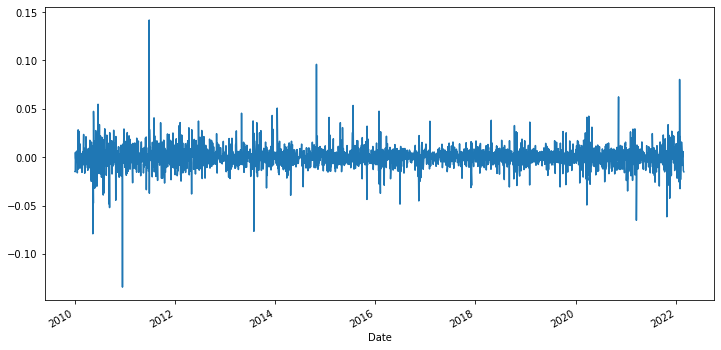

In [ ]:
reg_rslt2.resid.plot(figsize=(12,6))

By construction, the mean of these residuals is zero. That is, the regression estimate works in such a way that it ensures that the average residual is zero.

In [ ]:
reg_rslt2.resid.mean()

-4.80890979937343e-19

Compare this with the *total* return on the stock. Notice in particular the difference in early 2020: there's a lot of volatility in the stock's return, but it is mostly explained by the return on the market (since we don't see a similar increase in idiosyncractic volatility around this time).

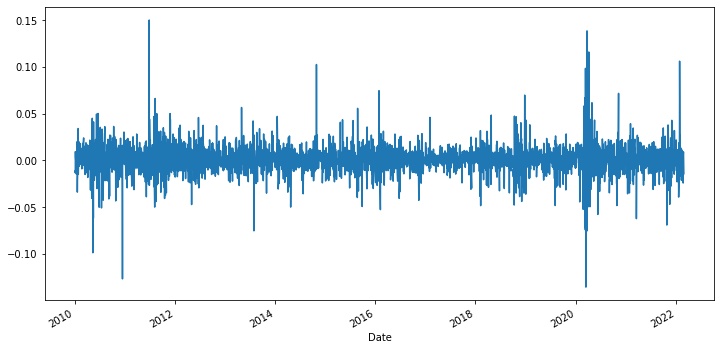

In [ ]:
reg['exret'].plot(figsize=(12,6))

In [ ]:
# idiosyncratic volatility
reg_rslt2.resid.std()

0.011444071806123399

In [ ]:
# total volatility
reg['exret'].std()

0.016235471039696078

## 3-factor regressions

The 3-factor Fama-French model adds the SMB and HML factors to the model:

$$R_{i,t}^e = \alpha_i + \beta^M_i R_{M,t}^e + \beta^S_i R_{SMB,t} + \beta^V_i R_{HML,t} + \epsilon_{i,t}$$

In [ ]:
# sm.OLS(y, x)
reg_model3 = sm.OLS(reg['exret'],
                    sm.add_constant(reg[['RMRF', 'SMB', 'HML']]))

reg_rslt3 = reg_model3.fit()

print(reg_rslt3.summary())

                            OLS Regression Results                            
Dep. Variable:                  exret   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     1069.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:34:05   Log-Likelihood:                 9362.8
No. Observations:                3059   AIC:                        -1.872e+04
Df Residuals:                    3055   BIC:                        -1.869e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.358      0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Running multiple regressions

Let's use data from the S&P 500 companies to run regressions for all the stocks.

---



In [ ]:
sp500 = pd.read_csv('https://github.com/stoffprof/qf22/raw/main/data/sp500_yahoo.csv',
                    index_col='Date', parse_dates=['Date'])

rets = sp500.pct_change().dropna(how='all')

rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5598 entries, 2000-01-04 to 2022-04-01
Columns: 505 entries, MMM to ZTS
dtypes: float64(505)
memory usage: 21.6 MB


We'll rename two columns in the Fama-French data:

- `Mkt–RF` will just be `RMRF`; and
- `RF` will be `rf` because there's a company with the ticker symbol RF and we'd end up with conflicting column names.

In [ ]:
ff_d = ff_d.rename(columns={'Mkt-RF': 'RMRF', 'RF':'rf'})

In [ ]:
# first tell python not to give nuisance warnings about upcoming syntax
# changes for pd.concat
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def regression(ticker):
    reg = pd.merge(ff_d, rets[ticker], left_index=True, right_index=True)
    reg['exret'] = reg[ticker] - reg['rf']
    reg = reg.dropna()     # must drop missing values for regression
    reg_model = sm.OLS(reg['exret'],
                       sm.add_constant(reg[['RMRF', 'SMB', 'HML']]))
    reg_rslt = reg_model.fit()
    params = reg_rslt.params
    tvals = reg_rslt.tvalues
    tvals.index = map(lambda x: 't_'+x, tvals.index)  # rename t-value index values
    rslt = pd.concat([params, tvals])
    rslt['R2'] = reg_rslt.rsquared
    return(rslt)

In [ ]:
regression('IBM')

const      -0.000225
RMRF        0.836574
SMB        -0.179811
HML         0.263020
t_const    -1.199451
t_RMRF     47.807677
t_SMB      -5.512125
t_HML      10.607888
R2          0.455780
dtype: float64

Now we can just loop over the companies, run regressions, and store the results. We'll just do the first 5 companies as an example.

In [ ]:
betas = {}
for tic in rets.iloc[:,:5]:
    betas[tic] = regression(tic)

betas = pd.DataFrame(betas).T

In [ ]:
betas

,const,RMRF,SMB,HML,t_const,t_RMRF,t_SMB,t_HML,R2
MMM,-0.000097,0.852720,-0.117132,0.292916,-0.581656,54.714338,-4.031626,13.264308,0.529494
AOS,0.000366,0.935693,0.385402,0.224750,1.599280,43.898445,9.699285,7.441538,0.453465
ABT,0.000186,0.853042,-0.394854,-0.270190,1.042381,51.179680,-12.707925,-11.440443,0.463555
ABBV,0.000438,0.835343,-0.170796,-0.115542,1.428680,29.061874,-3.318423,-3.112126,0.268483
ABMD,0.000937,1.039990,0.567111,-0.616849,2.029973,24.170823,7.070349,-10.117851,0.212281
